In [1]:
!pip3 install torch==1.8.2+cu102 torchvision==0.9.2+cu102 torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
    

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |████████████████████████████████| 804.1 MB 5.0 kB/s eta 0:00:012   |▋                               | 16.1 MB 2.7 MB/s eta 0:04:53     |█████████████████████▏          | 530.6 MB 3.1 MB/s eta 0:01:28     |████████████████████████▋       | 618.7 MB 4.1 MB/s eta 0:00:45█████▏ | 758.3 MB 3.6 MB/s eta 0:00:13
     |████████████████████████████████| 17.3 MB 10 kB/s  eta 0:00:01
     |████████████████████████████████| 1.9 MB 5.1 MB/s eta 0:00:01
  Using cached dataclasses-0.8-py3-none-any.whl (19 kB)


In [3]:
!git clone https://github.com/ultralytics/yolov5
    

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5


In [9]:
!cd yolov5


In [11]:
cd yolov5


/home/ayoub/Desktop/hakima /yolov5


In [13]:
!pip install -r requirements.txt



     |████████████████████████████████| 49.9 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 4.5 MB/s eta 0:00:01
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
     |████████████████████████████████| 4.9 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 1.8 MB/s eta 0:00:01
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
     |████████████████████████████████| 146 kB 3.8 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [15]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/ayoub/.cache/torch/hub/master.zip


YOLOv5 🚀 2021-10-10 torch 1.8.2+cu102 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [16]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

In [18]:
img ="https//ultralytics.com/images/zidane.jpg"

In [19]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [20]:
results = model(img)

In [21]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 959.7ms pre-process, 141.6ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


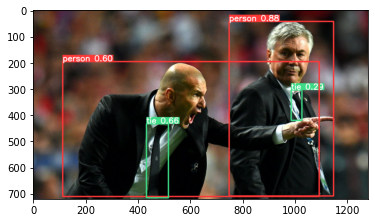

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [23]:
results.show()

In [41]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [11]:
import uuid   # Unique identifier
import os
import time

In [42]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20


In [43]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [39]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.0c28aa86-29e7-11ec-add8-8d8459e65bf7.jpg


In [46]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data/images/awake.04c29e36-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2a1a6-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2a43a-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2a6a6-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2a8f4-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2ab4c-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2ad9a-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2afe8-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2b22c-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2b484-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2b6c8-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2b916-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2bb50-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2bda8-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2bfe2-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2c2bc-29e8-11ec-add8-8d8459e65bf7.jpg
data/images/awake.04c2c50a-29e8-11ec-add8-8d8459e65bf7.j

In [47]:
!git clone https://github.com/tzutalin/labelImg
    

Cloning into 'labelImg'...
remote: Enumerating objects: 1849, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 1849 (delta 39), reused 55 (delta 19), pack-reused 1759
Receiving objects: 100% (1849/1849), 232.81 MiB | 1.98 MiB/s, done.
Resolving deltas: 100% (1087/1087), done.


In [ ]:
!sudo apt-get install pyqt5-dev-tools

In [2]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "train.py", line 620, in <module>
    main(opt)
  File "train.py", line 497, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/home/ayoub/Desktop/hakima /yolov5/utils/general.py", line 326, in check_file
    assert len(files), f'File not found: {file}'  #

In [11]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


/bin/bash: line 0: cd: yolov5: No such file or directory


In [4]:
 !python train.py --img 640 --batch 16 --epochs 3 --data dataset.yaml --weights yolov5s.pt

python: can't open file 'train.py': [Errno 2] No such file or directory


In [6]:
!ls

Untitled.ipynb	yolov5


In [7]:
cd yolov5


/home/ayoub/Desktop/hakima /yolov5


In [15]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "train.py", line 620, in <module>
    main(opt)
  File "train.py", line 497, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/home/ayoub/Desktop/hakima /yolov5/utils/general.py", line 306, in check_yaml
    return check_file(file, suffix)
  File "/home/a

In [22]:
..cd

SyntaxError: invalid syntax (<ipython-input-22-9c406e00f513>, line 1)

In [23]:
../

SyntaxError: invalid syntax (<ipython-input-23-1baf4dd994b0>, line 1)

NameError: name 'torch' is not defined

In [1]:
pwd


'/home/ayoub/Desktop/hakima '

In [2]:
ls


Untitled.ipynb  yolov5/


In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/ayoub/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-10-11 torch 1.8.2+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7099759 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()